<a href="https://colab.research.google.com/github/MekhzZ/opencv_bootcamp_exercise/blob/main/03_Annotating_Images.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing required libraries

import os
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline
# matplotlib jupyter support

In [ ]:
# it's always good practice to print the library versions for any future use

import sys
print("python", sys.version)
print("cv2 version:", cv2.__version__)
print("numpy version:", np.__version__)
print("matplotlib version:", matplotlib.__version__)
print("os version:", os.name)
print("zipfile version:", ZipFile.__name__)


python 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
cv2 version: 4.11.0
numpy version: 2.0.2
matplotlib version: 3.10.0
os version: posix
zipfile version: ZipFile


In [ ]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [ ]:
# downloading assets

URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), "opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)


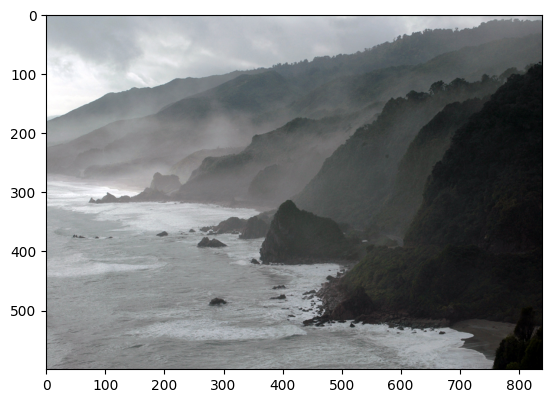

In [ ]:
# reading image

#Image('/content/New_Zealand_Coast.jpg')

img_bgr = cv2.imread('/content/New_Zealand_Coast.jpg')
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)

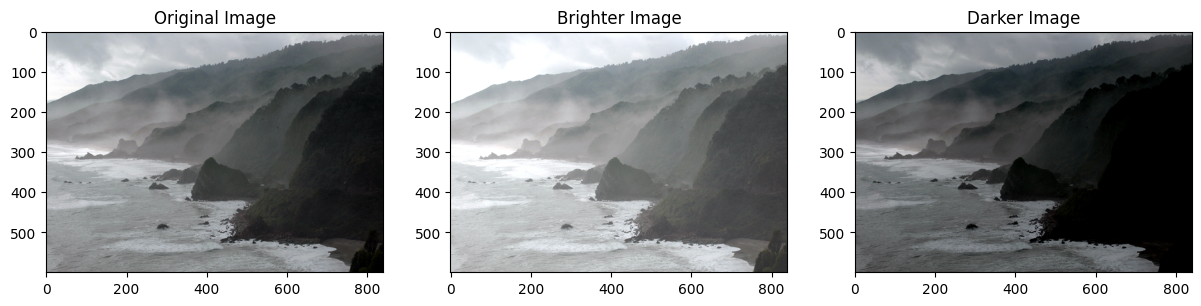

In [ ]:
# addition or brightness

matrix = np.ones(img_rgb.shape, dtype='uint8') * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_rgb);plt.title('Original Image')
plt.subplot(142);plt.imshow(img_rgb_brighter);plt.title('Brighter Image')
plt.subplot(143);plt.imshow(img_rgb_darker);plt.title('Darker Image')
plt.show()

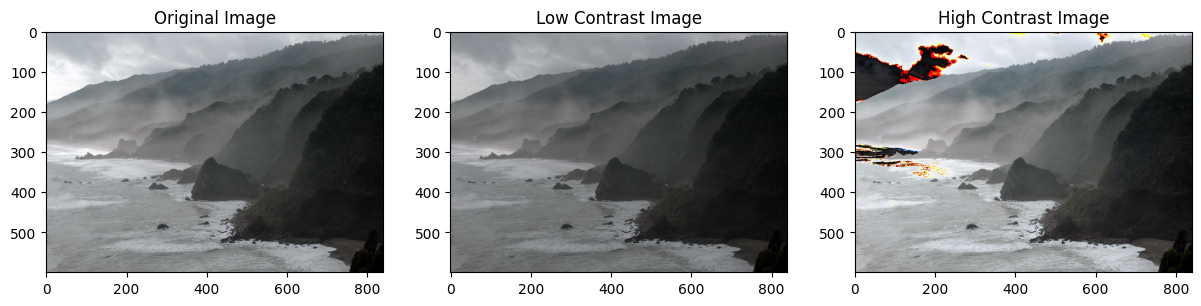

In [ ]:
# Multiplication or Contrast

matrix_low_contrast = np.ones(img_rgb.shape, dtype='uint8') * 0.8
matrix_high_contrast = np.ones(img_rgb.shape, dtype='uint8') * 1.2

img_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
img_rgb_high_contrast = np.uint8(cv2.multiply(np.float64(img_rgb),matrix_high_contrast))

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_rgb);plt.title('Original Image')
plt.subplot(142);plt.imshow(img_rgb_low_contrast);plt.title('Low Contrast Image')
plt.subplot(143);plt.imshow(img_rgb_high_contrast);plt.title('High Contrast Image')
plt.show()

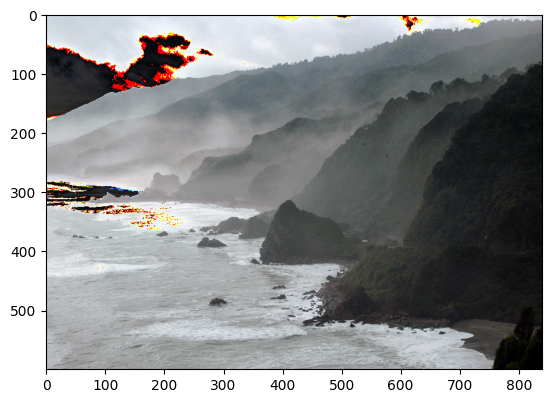

In [ ]:
plt.imshow(img_rgb_high_contrast)

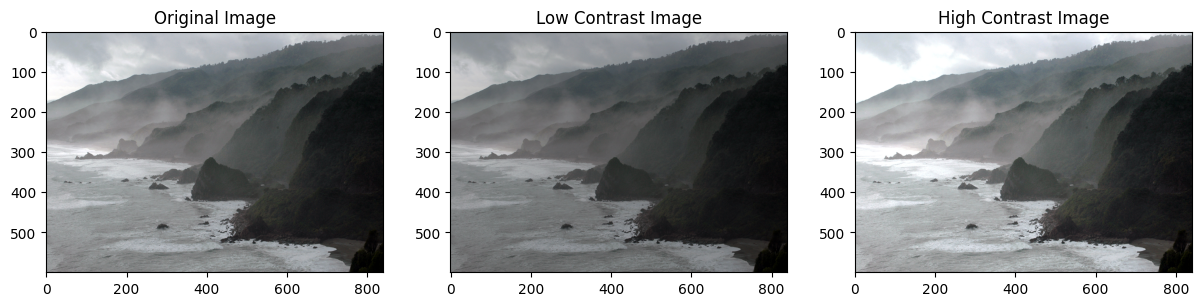

In [ ]:
matrix_low_contrast = np.ones(img_rgb.shape, dtype='uint8') * 0.8
matrix_high_contrast = np.ones(img_rgb.shape, dtype='uint8') * 1.2

img_rgb_low_contrast = np.uint8(cv2.multiply(np.float64(img_rgb), matrix_low_contrast))
# np.clip
img_rgb_high_contrast = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb),matrix_high_contrast),0,255))

plt.figure(figsize=[20,5])
plt.subplot(141);plt.imshow(img_rgb);plt.title('Original Image')
plt.subplot(142);plt.imshow(img_rgb_low_contrast);plt.title('Low Contrast Image')
plt.subplot(143);plt.imshow(img_rgb_high_contrast);plt.title('High Contrast Image')
plt.show()

In [ ]:
# Image thresholding

img_read = cv2.imread('/content/building-windows.jpg',0)

In [ ]:
retval, img_thresh = cv2.threshold(img_read, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)

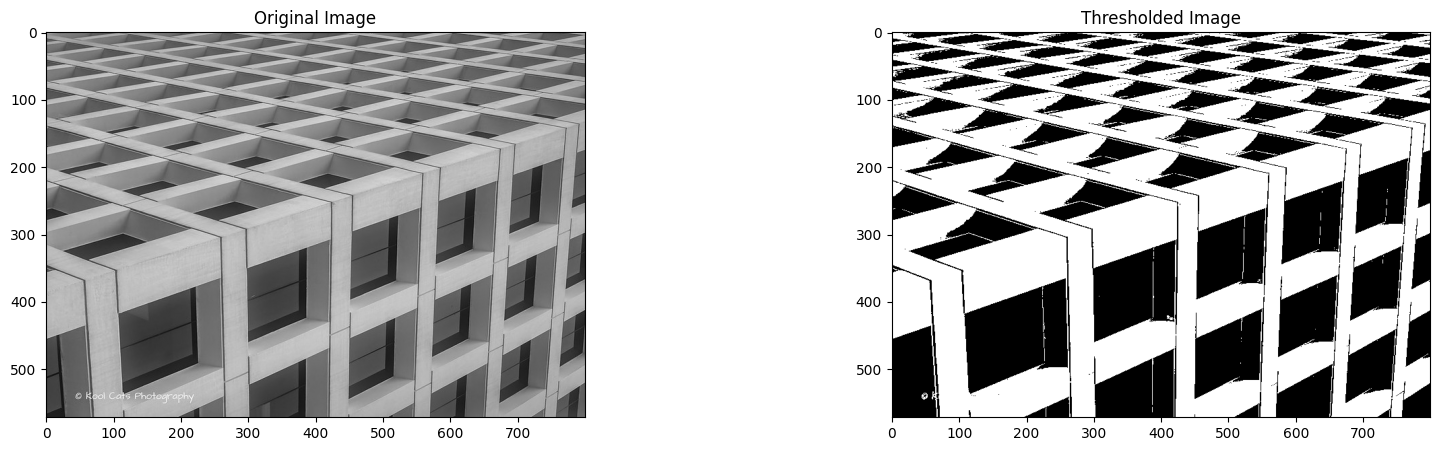

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_read, cmap='gray');plt.title('Original Image')
plt.subplot(122);plt.imshow(img_thresh, cmap='gray');plt.title('Thresholded Image')
plt.show()

In [ ]:
# use of threshold , an example of music sheet

piano_sheet_img = cv2.imread('/content/Piano_Sheet_Music.png',0)

In [ ]:
# use of adaptive thresh

adap_piano = cv2.adaptiveThreshold(piano_sheet_img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

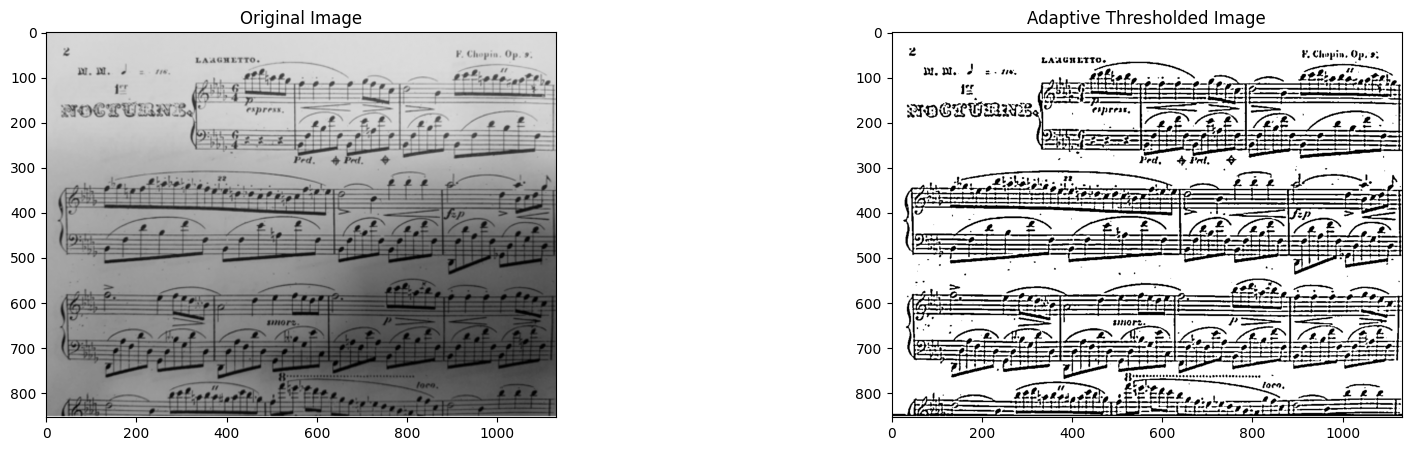

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(piano_sheet_img, cmap='gray');plt.title('Original Image')
plt.subplot(122);plt.imshow(adap_piano, cmap='gray');plt.title('Adaptive Thresholded Image')
plt.show()

In [ ]:
img_rec = cv2.imread('/content/rectangle.jpg',0)
img_cir = cv2.imread('/content/circle.jpg',0)

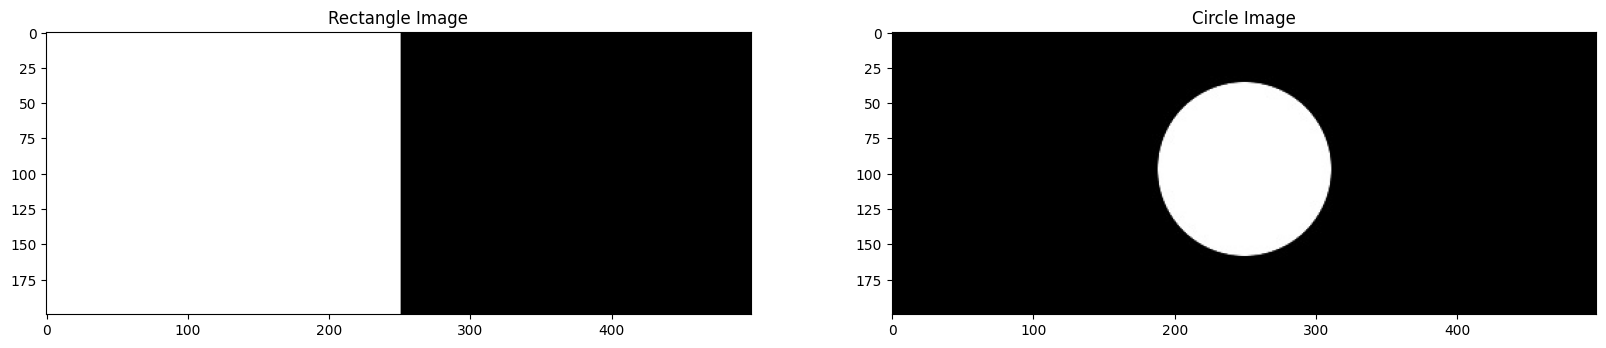

In [ ]:
plt.figure(figsize=[20,5])
plt.subplot(121);plt.imshow(img_rec, cmap='gray');plt.title('Rectangle Image')
plt.subplot(122);plt.imshow(img_cir, cmap='gray');plt.title('Circle Image')
plt.show()

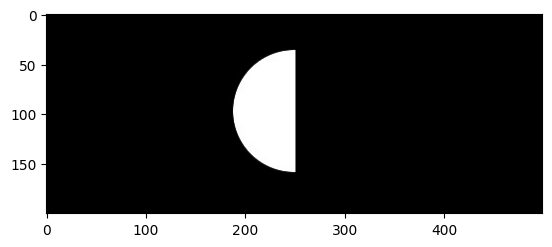

In [ ]:
# and operator "Jaha milyo teslai highlight garyo"

result = cv2.bitwise_and(img_rec, img_cir, mask =None)
plt.imshow(result, cmap='gray')

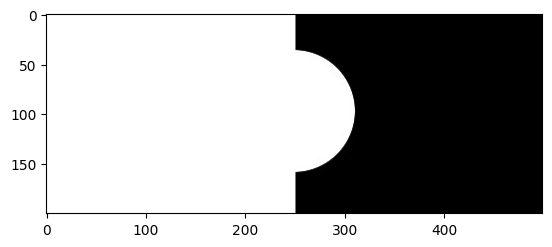

In [ ]:
# or operartor

result = cv2.bitwise_or(img_rec, img_cir, mask =None)
plt.imshow(result, cmap='gray')

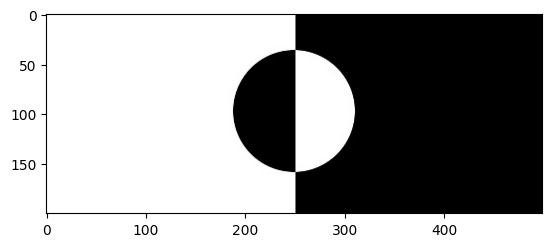

In [ ]:
# xor operator

result = cv2.bitwise_xor(img_rec, img_cir, mask =None)
plt.imshow(result, cmap='gray')

## task : Application logo Manipulation

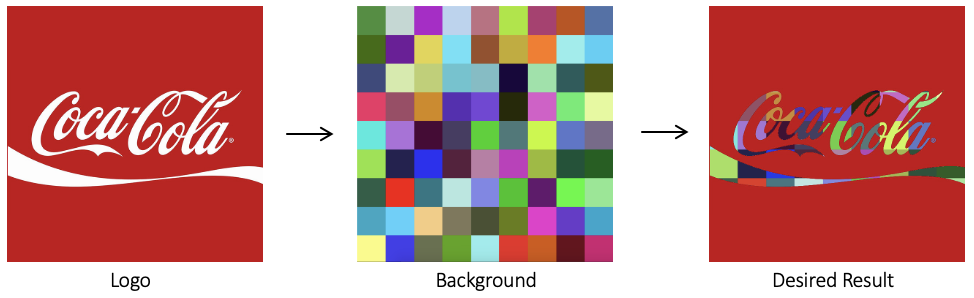

In [ ]:
# the final result we want from this process

Image("/content/Logo_Manipulation.png")

In [ ]:
# fg_image we want

foreground_img = cv2.cvtColor(cv2.imread('/content/coca-cola-logo.png'), cv2.COLOR_BGR2RGB)

# we want the height and width of fg_image to aline bg_img along with fg

foreground_img_h = foreground_img.shape[0]
foreground_img_w = foreground_img.shape[1]

In [ ]:
foreground_img.shape

(700, 700, 3)

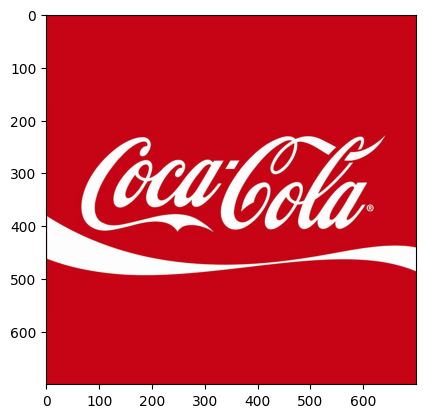

In [ ]:
plt.imshow(foreground_img)

In [ ]:
# reading bg_image and resizing accordingly with fg_image

bg_img = cv2.cvtColor(cv2.imread('/content/checkerboard_color.png'), cv2.COLOR_BGR2RGB)

bg_img = cv2.resize(bg_img, (foreground_img_w, foreground_img_h), cv2.INTER_AREA)

In [ ]:
bg_img.shape

(700, 700, 3)

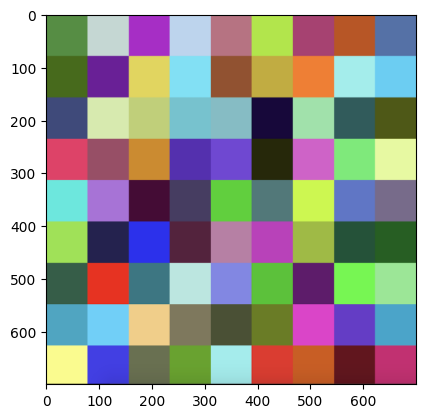

In [ ]:
plt.imshow(bg_img)

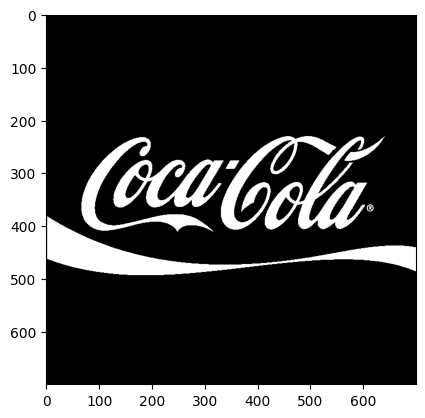

In [ ]:
# creating mask for og_image --> foreground_image

foreground_mask = cv2.cvtColor(foreground_img, cv2.COLOR_RGB2GRAY)

retval, foreground_mask = cv2.threshold(foreground_mask, thresh = 127, maxval = 255, type = cv2.THRESH_BINARY)

plt.imshow(foreground_mask, cmap='gray')

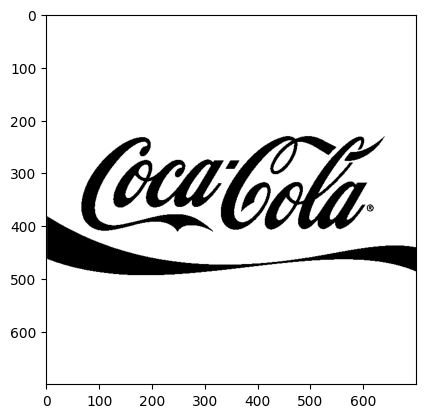

In [ ]:
# invert mask

foreground_mask_inv = cv2.bitwise_not(foreground_mask)
plt.imshow(foreground_mask_inv, cmap='gray')

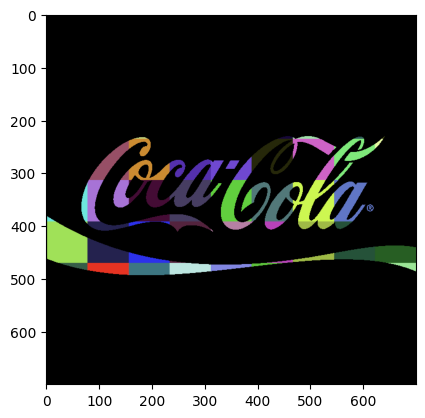

In [ ]:
# let's apply bg on mask

bg_img_masked = cv2.bitwise_and(bg_img, bg_img, mask = foreground_mask)
plt.imshow(bg_img_masked)

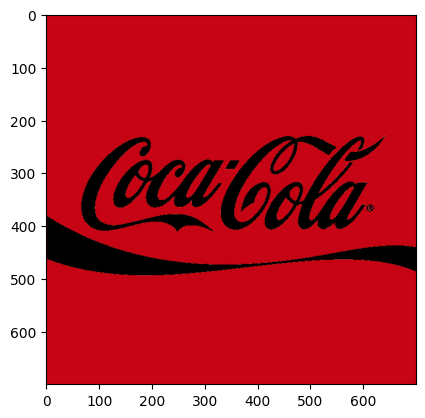

In [ ]:
foreground_mask_img = cv2.bitwise_and(foreground_img, foreground_img, mask = foreground_mask_inv)
plt.imshow(foreground_mask_img)

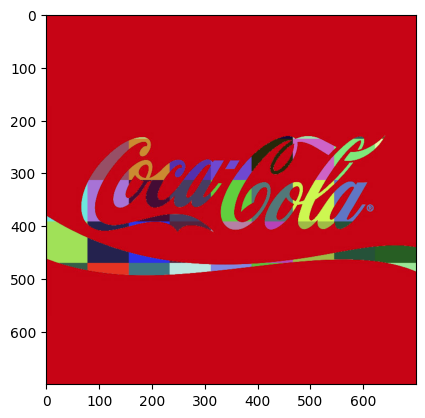

In [ ]:
# let's add fg and bg masks

result =cv2.add(bg_img_masked, foreground_mask_img)
plt.imshow(result)

In [ ]:
cv2.imwrite('result.png', result[:,:,::-1])

True